##Como escolher o eps correto?

Usar o gráfico de vizinhos (k-distance graph) → Ordena distâncias mínimas e procura o "joelho" da curva.

Demonstração prática:

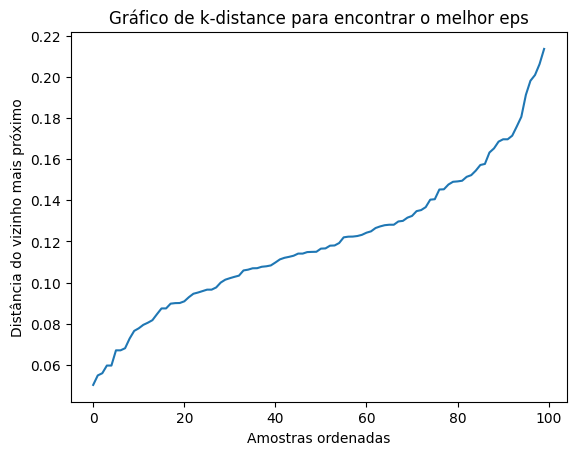

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

X = np.random.rand(100, 2)  # Criando um conjunto de dados aleatório
nbrs = NearestNeighbors(n_neighbors=5).fit(X)
distances, indices = nbrs.kneighbors(X)

# Ordenando as distâncias mínimas
distances = np.sort(distances[:, -1])

plt.plot(distances)
plt.xlabel("Amostras ordenadas")
plt.ylabel("Distância do vizinho mais próximo")
plt.title("Gráfico de k-distance para encontrar o melhor eps")
plt.show()


##Regra prática para escolher min_samples

MinPts ≈ dimensão dos dados × 2

Se os dados têm 2 dimensões, um bom ponto de partida é MinPts = 4.

Demonstração prática:

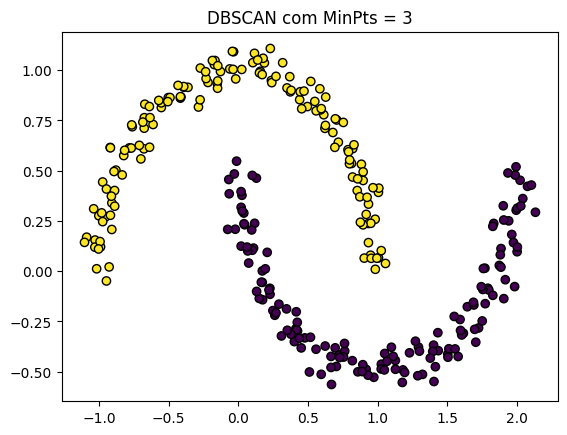

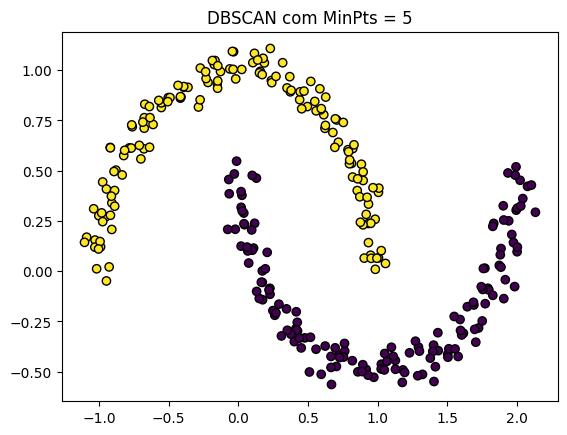

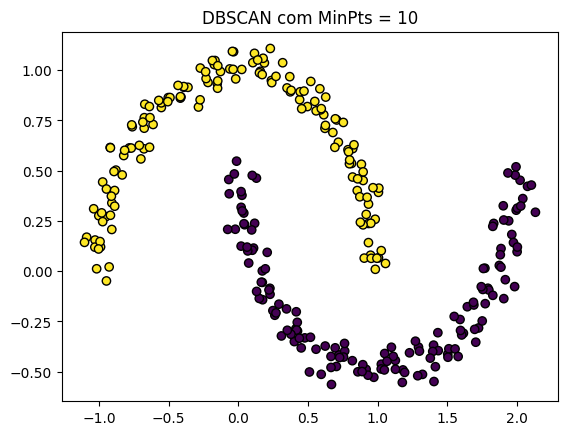

In [2]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# Criando dados com formato curvo
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Aplicando DBSCAN com diferentes valores de MinPts
for min_pts in [3, 5, 10]:
    dbscan = DBSCAN(eps=0.2, min_samples=min_pts)
    clusters = dbscan.fit_predict(X)

    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', edgecolors='k')
    plt.title(f"DBSCAN com MinPts = {min_pts}")
    plt.show()
